In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [ ]:
#DATA COLLECTION
df = pd.read_csv('/content/dataset2.csv')

In [ ]:
df

,Sl. No.,Year,State/UT,Institutional Care (Homes) - Number Assisted,Institutional Care (Homes) - Beneficiaries,Open Shelters - Number Assisted,Open Shelters - Beneficiaries,Specialised Adoption Agencies - Number Assisted,Specialised Adoption Agencies - Beneficiaries,Juvenile Justice Board - Number Assisted
0,1,2018-19,Andhra Pradesh,66.0,2316.0,13.0,342.0,14.0,144.0,13
1,2,2018-19,Arunachal Pradesh,4.0,76.0,0.0,0.0,1.0,9.0,21
2,3,2018-19,Assam,37.0,1765.0,3.0,51.0,23.0,69.0,33
3,4,2018-19,Bihar,26.0,1567.0,5.0,134.0,13.0,138.0,38
4,5,2018-19,Chhattisgarh,65.0,2325.0,10.0,117.0,12.0,120.0,27
...,...,...,...,...,...,...,...,...,...,...
106,33,2020-21,Ladakh,NaN,NaN,NaN,NaN,NaN,NaN,2
107,34,2020-21,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,1
108,35,2020-21,Delhi,28.0,1196.0,9.0,254.0,3.0,50.0,6
109,36,2020-21,Puducherry,25.0,906.0,1.0,15.0,2.0,35.0,4


In [ ]:
#DATA CLEANING AND PREPROCESSING
 #1.Drop unnecessary columns:
df.drop(['Sl. No.','Year','Institutional Care (Homes) - Number Assisted','Institutional Care (Homes) - Beneficiaries','Open Shelters - Number Assisted','Open Shelters - Beneficiaries','Specialised Adoption Agencies - Number Assisted','Specialised Adoption Agencies - Beneficiaries'], axis=1, inplace=True)
 #2.Check for missing values:
df.isnull().sum()
 #3.Encode categorical variables:
df = pd.get_dummies(df, columns=['State/UT'])

In [ ]:
#4.Normalize the data:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
#EXPLORATORY DATA ANAYLSIS
#Check the structure of the dataset
print(df.head())

   Juvenile Justice Board - Number Assisted  \
0                                        13   
1                                        21   
2                                        33   
3                                        38   
4                                        27   

   State/UT_Andaman & Nicobar Islands  State/UT_Andhra Pradesh  \
0                                   0                        1   
1                                   0                        0   
2                                   0                        0   
3                                   0                        0   
4                                   0                        0   

   State/UT_Arunachal Pradesh  State/UT_Assam  State/UT_Bihar  \
0                           0               0               0   
1                           1               0               0   
2                           0               1               0   
3                           0               0               

In [ ]:
#Check the information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 40 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Juvenile Justice Board - Number Assisted       111 non-null    int64
 1   State/UT_Andaman & Nicobar Islands             111 non-null    uint8
 2   State/UT_Andhra Pradesh                        111 non-null    uint8
 3   State/UT_Arunachal Pradesh                     111 non-null    uint8
 4   State/UT_Assam                                 111 non-null    uint8
 5   State/UT_Bihar                                 111 non-null    uint8
 6   State/UT_Chandigarh                            111 non-null    uint8
 7   State/UT_Chhattisgarh                          111 non-null    uint8
 8   State/UT_Dadra & Nagar Haveli and Daman & Diu  111 non-null    uint8
 9   State/UT_Dadra and Nagar Haveli                111 non-null    uint8
 10  St

In [ ]:
#Check the summary statistics of the dataset
print(df.describe())

       Juvenile Justice Board - Number Assisted  \
count                                111.000000   
mean                                  38.324324   
std                                  113.411172   
min                                    1.000000   
25%                                    8.000000   
50%                                   16.000000   
75%                                   32.500000   
max                                  717.000000   

       State/UT_Andaman & Nicobar Islands  State/UT_Andhra Pradesh  \
count                          111.000000               111.000000   
mean                             0.027027                 0.027027   
std                              0.162898                 0.162898   
min                              0.000000                 0.000000   
25%                              0.000000                 0.000000   
50%                              0.000000                 0.000000   
75%                              0.000000         

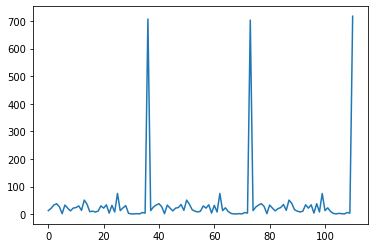

In [ ]:
# Visualizing target variable distribution
plt.plot(df['Juvenile Justice Board - Number Assisted'])
plt.show()

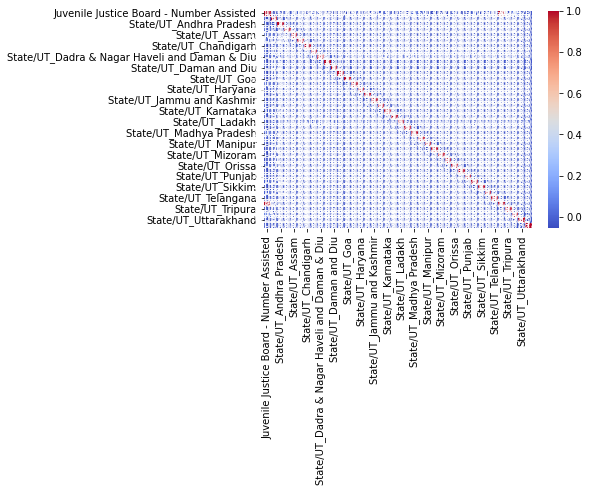

In [ ]:
#Correlation
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#EXPLORATORY DATA ANALYSIS
#Central tendancy measure
print('Mean',df['Juvenile Justice Board - Number Assisted'].mean())
print('Median',df['Juvenile Justice Board - Number Assisted'].median())
print('Mode',df['Juvenile Justice Board - Number Assisted'].mode())

Mean 38.32432432432432
Median 16.0
Mode 0     1
1    22
dtype: int64


In [ ]:
#Measure of dispersion
min=df['Juvenile Justice Board - Number Assisted'].min()
max=df['Juvenile Justice Board - Number Assisted'].max()
print(min,max)
print('Range',max-min)
print('var',df['Juvenile Justice Board - Number Assisted'].var())
print('std',df['Juvenile Justice Board - Number Assisted'].std())

1 717
Range 716
var 12862.093857493852
std 113.41117166088115


In [ ]:
#IQR
Q1=df['Juvenile Justice Board - Number Assisted'].quantile(.25)
Q3=df['Juvenile Justice Board - Number Assisted'].quantile(.75)
print('IQR',Q3-Q1)

IQR 24.5


In [ ]:
#ZCORE 
import scipy.stats as stats
Zscore=stats.zscore(df['Juvenile Justice Board - Number Assisted'])
print('Zscore',Zscore)

Zscore 0     -0.224309
1     -0.153450
2     -0.047160
3     -0.002873
4     -0.100305
         ...   
106   -0.321741
107   -0.330599
108   -0.286311
109   -0.304026
110    6.011344
Name: Juvenile Justice Board - Number Assisted, Length: 111, dtype: float64


Mean 38.32432432432432
Median 16.0
Mode 0     1
1    22
dtype: int64


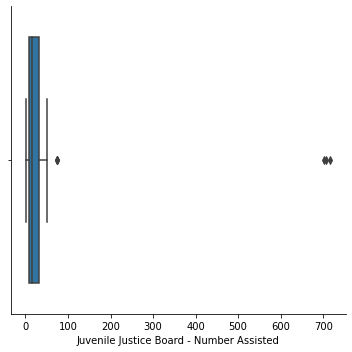

In [ ]:
#BOXPLOT (OUTLIER DETECTION)
import seaborn as sns
sns.catplot(x='Juvenile Justice Board - Number Assisted',kind='box',data=df)
print('Mean',df['Juvenile Justice Board - Number Assisted'].mean())
print( 'Median' ,df['Juvenile Justice Board - Number Assisted'].median())
print( 'Mode' ,df[ 'Juvenile Justice Board - Number Assisted' ].mode())

IQR 24.5


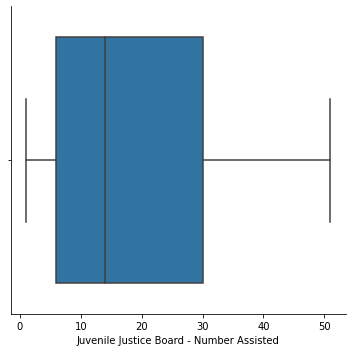

In [ ]:
#REMOVING OUTLIER
Ql=df['Juvenile Justice Board - Number Assisted'].quantile(.25)
Q3=df['Juvenile Justice Board - Number Assisted'].quantile(.75)
IQR=Q3-Q1
print('IQR',Q3-Q1)
lb=Q1-1.5*IQR

ub=Q3+1.5*IQR

dfout=df[(df['Juvenile Justice Board - Number Assisted']>lb) & (df['Juvenile Justice Board - Number Assisted']<ub) ]
dfout.shape
dfout.tail()
sns.catplot(x='Juvenile Justice Board - Number Assisted',kind='box',data=dfout)

In [ ]:
#Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop(['Juvenile Justice Board - Number Assisted'], axis=1)
y = df['Juvenile Justice Board - Number Assisted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Training the model on the training data
model.fit(X_train, y_train)

#Make predictions on the test data
y_pred = model.predict(X_test)

#Evaluate the model (PERFORMANCE METRICS)
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('R2 score:', r2)
print('Mean squared error:', mse)
print('Root mean squared error:', rmse)

R2 score: 0.9996828920399103
Mean squared error: 6.360733695652174
Root mean squared error: 2.5220495030138035
